# Lab 2

##### Pulkit Mahajan (pm28838), Anuv Gupta (ag68799) and Jason Gu (jg68927)

In [66]:
#imports cell
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import math, random

1. a) 
Look at the data in DF1 in Lab2.zip. Which columns are (pairwise) correlated? Figure out how to do this with Pandas, and also how to do this with Seaborn.

In [67]:
#read our data
DF1 = pd.read_csv("DF1", usecols=[1,2,3,4])

In [68]:
#Find correlation via Pandas
corrPandas = DF1.corr()
print(corrPandas)

          0         1         2         3
0  1.000000 -0.003998  0.990066  0.004111
1 -0.003998  1.000000 -0.004085 -0.990235
2  0.990066 -0.004085  1.000000  0.004067
3  0.004111 -0.990235  0.004067  1.000000


corrPandas is a correlation matrix generated by Pandas

Find correlation via Seaborn
2 methods I found - 
 -1. use seaborn.heatmap(corrPandas)
 -2. use seaborn.pairplot(DF1)

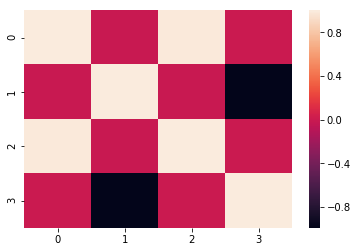

In [70]:
#Method 1:
sb.heatmap(corrPandas)

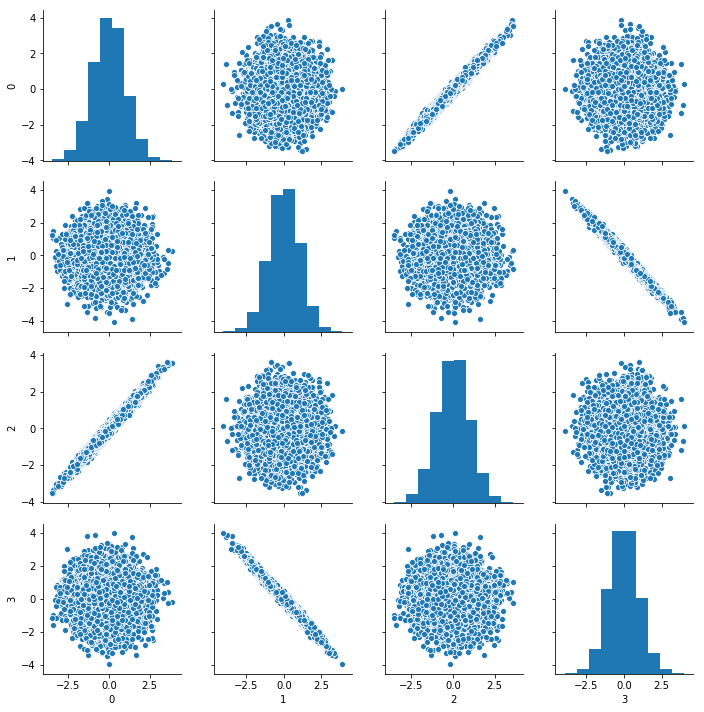

In [71]:
sb.pairplot(DF1)

1. b) Compute the covariance matrix of the data. Write the explicit expression for what this
is, and then use any command you like (e.g., np.cov) to compute the 4 × 4 matrix.
Explain why the numbers that you get fit with the plots you got.

In [72]:
np.cov(DF1)

array([[ 0.90590606, -0.18219351,  1.38000684, ..., -1.10234248,
         0.32833244,  0.87379896],
       [-0.18219351,  0.22027101, -0.71731923, ...,  0.86453462,
        -0.07054978, -0.1115653 ],
       [ 1.38000684, -0.71731923,  3.15550751, ..., -3.21668302,
         0.51138301,  1.17832303],
       ...,
       [-1.10234248,  0.86453462, -3.21668302, ...,  3.67220519,
        -0.3998914 , -0.80375089],
       [ 0.32833244, -0.07054978,  0.51138301, ..., -0.3998914 ,
         0.12207671,  0.32181487],
       [ 0.87379896, -0.1115653 ,  1.17832303, ..., -0.80375089,
         0.32181487,  0.88037682]])

In [73]:
#I don't think this one is correct because I think numpy is factoring in the row indexes 
#(0, 1, 2, 3, etc seen in other graphs), which screws up the calculations

In [74]:
DF1.cov()

,0,1,2,3
0,1.001558,-0.004012,0.991624,0.004125
1,-0.004012,1.005378,-0.004099,-0.995457
2,0.991624,-0.004099,1.001589,0.004081
3,0.004125,-0.995457,0.004081,1.005168


Explain why the numbers that you get fit with the plots you got.

# 2. Outliers

Consider the two-dimensional data in DF2 in Lab2 Data.zip. Look at a scatter
plot of the data. It contains two points that look like potential outliers. Which one is “more”
outlying? Propose a transformation of the data that makes it clear that the point at (−1, 1)
is more outlying than the point at (5.5, 5), even though the latter point is“farther away”
from the nearest points. Plot the data again after performing this transformation. Provide
discussion as appropriate to justify your choice of transformation

In [60]:
DF2 = pd.read_csv("DF2", usecols=[1,2])
print(DF2)

             0         1
0     1.038502  0.835053
1     0.320455  0.149079
2     0.055480  0.271672
3    -0.007260 -0.126550
4    -1.237390 -1.049932
5     0.477841  0.336723
6    -0.486923 -0.459850
7     0.313020  0.123082
8     0.919790  0.956577
9     0.574238  0.471622
10   -0.745211 -0.955933
11   -0.472249 -0.660452
12    0.426001  0.275335
13    1.529169  1.485045
14    0.454290  0.417083
15    2.225789  2.123942
16    0.325455  0.589621
17   -0.620078 -0.631947
18   -0.968355 -0.852067
19   -0.497867 -0.474271
20    0.138424  0.246833
21   -0.612432 -0.426946
22   -3.201179 -3.000997
23   -0.703764 -0.399714
24    1.601584  1.724664
25    0.191843  0.266744
26    0.125723  0.053597
27    0.221168  0.386691
28   -0.231375 -0.003476
29    0.536865  0.394512
...        ...       ...
9970 -2.730439 -2.701821
9971  0.688554  0.725510
9972 -0.884338 -0.785772
9973 -2.400426 -2.372839
9974 -1.598474 -1.623537
9975 -0.535834 -0.441412
9976 -1.100836 -1.014950
9977 -0.008764  0.009927


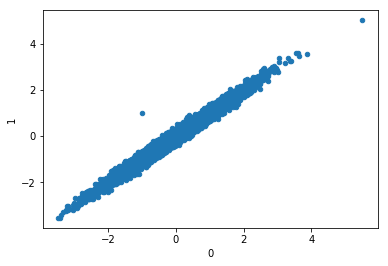

In [61]:
DF2.plot.scatter(x=0, y=1)

# 3. Even More Standard Error

Compute this empirically, as follows: We will generate data for a regression problem, solve it,
and see what the error is:  
a) Generate data as follows: xi ∼ N(0, 1), ei ∼ N(0, 1).  
b) Generate y by yi = β0 +xiβ +ei , where β0 = −3 and β = 0.  
   Note that since β = 0, this means that y and x are unrelated! The question we are exploring here is as follows: when we solve a regression problem, we are not going to find βˆ = 0 – we will find that βˆ takes some other values, hopefully close to zero. How do we know if the value of βˆ we get is statistically meaningful?  
   
  i) By creating fresh data and each time computing βˆ and recording βˆ − β, compute the
empirical standard deviation of the error for n = 150. By running a linear regression
of y vs. noise, we find βˆ = −0.15. Given your empirical computation of the standard
deviation of the error, how significant is the value −0.15?  
 ii) Now repeat the above experiment for different values of n. Plot these values, and on the
same plot, plot 1/
√n. How is the fit?

In [ ]:
#a)
def emp_std_dev(n):
    vals = []
    for i in range(n):
        x = np.random.normal()
        e = np.random.normal()
        y = -3 + np.dot(x, 0) + e
        
        bHat = ?
        val[i] = bHat - b
        
    return std_dev = np.std(val)

In [ ]:
emp_std_dev(150)

# 4. Names and Frequencies

1. Write a program that on input k and XXXX, returns the top k names from year XXXX.  
2. Write a program that on input Name returns the frequency for men and women of the 
    name Name.
3. It could be that names are more diverse now than they were in 1880, so that a name may be relatively the most popular, though its frequency may have been decreasing over the years. Modify the above to return the relative frequency. Note that in the next coming lectures we will learn how to quantify diversity using entropy
4. Find all the names that used to be more popular for one gender, but then became more popular for another gender
5. (Optional) Find something cool about this data set

In [347]:
#1. Write a program that on input k and XXXX, returns the top k names from year XXXX.  
def topNames(k, year):
    nameDF = pd.read_csv("Names/yob" + year + ".txt", header=None)
    cols = nameDF.columns[2]
    print(nameDF.nlargest(k, cols))


In [349]:
topNames(5, "1995")

                 0  1      2
15754      Michael  M  41404
15755      Matthew  M  32874
15756  Christopher  M  32672
15757        Jacob  M  31124
15758       Joshua  M  30715


(I'm not sure why it keeps printing the first entry of every file, but the first entry is not a largest entry)

In [385]:
#2. Write a program that on input Name returns the frequency for men and women of the name Name.
def nameFreq(name):
    mCount = 0
    fCount = 0
    for year in range(1880, 2016):
        currDF = pd.read_csv("Names/yob" + str(year) + ".txt", header=None)
        #we know each file has 1000 rows, and 3 columns (indexes, names, frequencies)
        for nameIdx in range(0, 1000):
            currName = currDF[0][nameIdx]#currDF[column][row]? ex. currDF[1][1] is the name col, and the second entry
            gender = currDF[1][nameIdx]
            if currName == str(name):   

                if gender == "F":
                    fCount += currDF[2][nameIdx]

                elif gender == "M":
                    mCount += currDF[2][nameIdx]

    print("Guys with name " + name + ": " + str(guys) + "    Girls with name " + name + ": " + str(girls))
    return mCount, fCount

In [386]:
name = "John"
guys, girls = nameFreq(name)


Guys with name John: 18424    Girls with name John: 20639


In [380]:
#3. It could be that names are more diverse now than they were in 1880, so that a name may be relatively the most popular, 
# though its frequency may have been decreasing over the years. Modify the above to return the relative frequency. 
def relativeFreq(name, year):
     #relative freq = number times event occured / total occurrances
    nameCount = 0
    totalNamesThatYear = 0
    currDF = pd.read_csv("Names/yob" + str(year) + ".txt", header=None)
        #we know each file has 1000 rows, and 3 columns (indexes, names, frequencies)
    for nameIdx in range(0, len(currDF)):
        currName = currDF[0][nameIdx]#currDF[column][row]? ex. currDF[1][1] is the name col, and the second entry
        gender = currDF[1][nameIdx]
        totalNamesThatYear += currDF[2][nameIdx]
        if name == currName:
            nameCount += currDF[2][nameIdx]
                
    return nameCount/totalNamesThatYear

In [381]:
relFreq = relativeFreq("John", 2014)
print(relFreq)

0.0028900919113759374


In [374]:
0.0001305371958439275

0.0001305371958439275

In [377]:
#4. Find all the names that used to be more popular for one gender, but then became more popular for another gender

In [490]:
year = 1880

shiftVal = {}
finalNames = {}
mCount = 0
fCount = 0
#Suppose you calculate the difference in year t as δt=ft,male−ft,female, 
#then if δt is always positive, that name has always been more popular as a male's name, 
#and vice versa. You can check whether δt switched its sign at some time by comparing 
#mintδt and maxtδt without going through each year.
# print(shiftVal)
for year in range(1880, 2016):
    currDF = pd.read_csv("Names/yob" + str(year) + ".txt", header=None)
    print("...............")
    print(year)
    print("...............")
    processedNamesThisYear = {}
    for nameIdx in range(0, len(currDF)):
        currName = currDF[0][nameIdx]
        if currName not in processedNamesThisYear:
            processedNamesThisYear[currName] = 1
            if currName not in finalNames:
                nameDF = currDF.loc[currDF[0] == currName]
                mDF = nameDF.loc[nameDF[1] == "M"]
                if not mDF.empty:
                    mCount = int(mDF[2])
                fDF = nameDF.loc[nameDF[1] == "F"]
                if not fDF.empty:
                    fCount = int(fDF[2])

                val = mCount - fCount
    #             print("Name is + " + currName)
                if currName in shiftVal:
                    xVal = shiftVal[currName]
    #                 print(type(xVal))
    #                 print(type(val))
                    if abs(xVal) != abs(val):
    #                     print(xVal)
    #                     print(val)
                        if (xVal ^ val) < 0:
                            #THE SIGNS ARE NOT THE SAME
                            finalNames[currName] = 1
                            print(currName)

                else:
                    #just need to add it here to reference later
                    shiftVal[currName] = val  
# print(shiftVal)

...............
1880
...............
...............
1881
...............
Charlotte
Rebecca
Belle
Kathryn
Jane
Olive
Virginia
Irene
Hannah
Henrietta
Luella
Lela
Ina
Celia
Bettie
Inez
Rosie
Linnie
Adeline
Loretta
Lois
Mittie
Leah
Elva
Olivia
Gussie
Rosetta
Wilhelmina
Lucille
Polly
Elnora
Phoebe
Teresa
Hulda
Louella
Myrtie
Adele
Jeannette
Virgie
Dessie
Lila
Violet
Madge
Regina
Roberta
Eugenia
Malinda
Mandy
Cecilia
Goldie
Lina
Linda
Jeanette
Leola
Lucile
Gertie
Bridget
Freda
Georgie
Lilla
Nola
Letha
Alvina
Antoinette
Bell
Janet
Mertie
Erma
Lorena
Annette
Norma
Elsa
Frieda
Melvina
Dona
Frankie
Gracie
Leota
Orpha
Savannah
Vinnie
Dena
Eda
Leonora
Leora
Elise
Isabell
Jimmie
Julie
Kitty
Margret
Nan
Pearlie
Zoe
Angeline
Joanna
Lennie
Zora
Adda
Georgiana
Phebe
Letitia
Nella
Octavia
Velma
Adaline
Ava
Cathrine
Emmie
Ettie
Fay
Lavina
Luna
Pinkie
Zelma
Alida
Katheryn
Lotta
Lucia
Malissa
Maybelle
Aurelia
Donna
Neva
Queen
Chloe
Constance
Deborah
Donnie
Iola
Lavinia
Annabelle
Antonia
Kathleen
Myrta
Cam

...............
1896
...............
Nelle
Alva
Tracy
Buena
Carmella
Claribel
Perle
Perlie
Persis
Reita
Rosabelle
Rozella
Rutha
Sabra
Velva
Versa
Vivien
Vivienne
Stacy
Tomasa
Verta
Adrienne
Agda
Albie
Alvia
Antionette
Arletta
Beatriz
Benita
Berneice
Calista
Catalina
Cena
Chanie
Germaine
Lillar
Fredda
Maryanna
Princess
Theola
Adra
Laurene
Paulyne
...............
1897
...............
Myra
Bess
Jeanne
Dorris
Doshia
Lavern
Letty
Oneita
Georgena
Lorina
Maddie
...............
1898
...............
Lilly
Christina
Mathilda
Katharine
Louisa
Melba
Vester
Beverly
Blanchie
Caldonia
Carie
Caryl
Cattie
Edie
Edla
Edrie
Elenore
Elfie
Elina
Elizbeth
Ellanora
Else
Elvena
Genora
Telitha
Octava
...............
1899
...............
Harriett
Sybil
Freida
Gretchen
Ima
Marvel
Reva
Bernadine
Manila
Arlene
Lupe
Chrystal
Cressie
Elvia
Eudora
Gertha
Everline
Edithe
Ivey
Jaunita
Jeane
Jeanie
Jeannie
Joann
Josepha
Gudrun
...............
1900
...............
Mamie
Blanche
Iris
Joyce
Elaine
Versie
Elberta
Josefina
Be

Darleen
Drue
Eulogia
Jerline
True
Tyne
Unice
Vader
Valia
Vee
Velora
Verdia
Aloise
Alonia
Alveda
Alyda
Ambrosia
Amelie
Aneta
Annamary
Annastasia
Annella
Arcelia
Janett
Joeanna
Pearlena
Rozell
Winafred
Coline
Donata
Etola
Romelia
Posie
...............
1916
...............
Theda
Alfreda
Charlene
Gwen
Annamae
Earlene
Eathel
Electa
Izola
Maryellen
Masako
Bettina
Casimira
Arla
Clarine
Ever
Glennis
Helvi
Toni
Velta
Weltha
Willena
Wilna
Alfrieda
Alzada
Burnette
Carla
Clydie
Corina
Maryan
Odeal
Reda
Rina
Dot
Eileene
Eleonor
Edell
Edris
Eilleen
Etheleen
Felicita
Flavia
Zera
Aiko
Aloha
Odean
Odessia
Enis
Erla
Francelia
Gaetana
Rosemond
Verlene
Paz
Rudell
Ruthann
Ruthanna
Sydell
Sydelle
Teruko
Trena
Wanza
Carnell
Claretta
Clemma
Clytee
Coleen
Cozetta
Dorsie
Precious
Rebeca
Robertine
Robina
Sadako
Sallye
Sherry
Shigeko
Sunshine
Thersa
Thomasine
Tosca
Verble
Vercie
Wavie
Wealthy
Wilmina
Wynne
Adena
Christen
Christiana
Claudette
Lether
Lillias
Lisa
Loeta
Lorita
Lorrene
Louvinia
Lovenia
Madeliene
Marg

Oneda
Del
Delena
Deltha
Dotty
Dura
Earma
Ellenor
Erleen
Fara
Bunnie
Captola
Cecila
Mida
Modene
Nela
Nema
Normalee
Novie
Pascuala
Pebble
Rebie
Roselee
Rosene
Rosette
Rotha
Sanjuana
Seena
Stephany
Carmie
Carmilla
Carolee
Charla
Christella
Clarita
Claudean
Dove
Earla
Earlena
Eldene
Eleaner
Elin
Ellan
Elloise
Elmarie
Enna
Esperansa
Evadean
Evalynn
San
Santiaga
Ardean
Argusta
Aria
Arlaine
Armenia
Arneda
Artemisa
Lenell
Lestie
Lindy
Lodena
Louine
Loveda
Lovelle
Lucielle
Luevinia
Lurine
Madline
Veral
Victoriana
Vincentina
Virdia
Burlie
Deon
Desta
Diamantina
Diva
Donita
Doralee
Doreene
Dorena
Eulean
Ruble
Rula
Russie
Ruthell
Ruthia
Selia
Sibbie
Smithie
Sondra
Addis
Ailsa
Aleane
Alfhild
Bernelle
Geraldyn
Janita
Martie
Quillie
Rachell
Ramelle
Raphaela
Reiko
Renner
Revella
Rhodie
Robbye
Tonnie
Willet
Bibiana
Bille
Fernie
...............
1923
...............
Lavonne
Leatrice
Dawn
Emilia
Rosina
Glenda
Doretha
Norene
Waneta
Blondell
Eilene
Ellene
Laila
Lidia
Sherley
Stephie
Sulema
Trilby
Tsuruko
Ver

Carilyn
Carleta
Mia
...............
1941
...............
Wendy
Heather
Laraine
Kathie
Nanette
Lynnette
Marylee
Nikki
Lesley
Wynona
Cheri
Leann
Louvenia
Ruthanne
Teddie
Alvera
Carolynne
Charlesetta
Classie
Nicki
Sharyl
Shelvie
Sherie
Tamra
Nicola
Cherryl
Lindalou
Valencia
Vanna
Vikki
Gari
Sonnie
Delrae
Donelle
...............
1942
...............
Lynn
Eula
Judi
Jerilyn
Ola
Callie
Jerilynn
Carrol
Karolyn
Kristin
Jerrilyn
Karan
Sheron
Georgeann
Michal
Pauletta
Joellen
Sharyn
Karyn
Joni
Kathi
Randi
Caron
Alexis
Hilary
Janith
Leeann
Pamella
Bari
Carron
Catheryn
Cherrill
Tracey
Bonney
Bryna
Carren
Greer
Henryetta
Kris
Lahoma
Larene
Latrelle
Leetta
Lorayne
Mariaelena
Marijo
Marinell
Marlea
Michaeleen
Aldene
Ricki
Tobey
Tonette
Valta
Rowan
Rowene
Royetta
Ruthy
Sarann
Seferina
Shareen
Sharlet
Sharone
Shelda
Shella
Sheral
Sherline
Sherra
Sherre
Shirline
Slyvia
Sunda
Synthia
Tamar
Tonja
Dede
Mareen
Vonetta
...............
1943
...............
Nellie
Agnes
Dora
Viola
May
Tana
Kristine
Susann
Merri

Caryn
Krista
Renae
Melodie
Kelley
Kelli
Keri
Liane
Cristy
Sharleen
Chandra
Deeann
Glynda
Kara
Alane
Penni
Leesa
Joannie
Corby
Florinda
Jenice
Kathe
Lavonna
Loralee
Rolanda
Sherrye
Linn
Machelle
Margene
Lacey
Lacinda
Marcee
Marcelyn
Ninette
Peri
Kerin
Kimbra
Lanelle
Vanassa
Cyndia
Danell
Darcella
Darnice
Davette
Daylene
Deatrice
Deby
Manon
Marchell
Maurya
Mayda
Melia
Meribeth
Milana
Milinda
Moana
Monda
Renne
Ria
Marce
Marquitta
Marshelle
Marthe
Marysue
Mela
Michella
Mireya
Neena
Neida
Neomi
Noralee
Pamalee
Patra
Phyllistine
Rebel
Renelle
Rexanna
Roselia
Ruta
Samra
Sana
Scarlette
Scherrie
Shary
Sheilia
Shere
Sherlynn
Sherma
Sheryn
Shoshana
Starlett
Glendell
Graceann
Gwena
Gwyndolyn
Hedda
Heddy
Hinda
Holle
Jacci
Jaimie
Jamye
Janeece
Janeva
Janit
Jannine
Jayn
Jeaninne
Jeneane
Jillene
Jolanda
Pier
Rasa
Raynetta
Redia
Regene
Dallis
Shay
Shayla
Sherelyn
Sherle
Sherrion
Sheryel
Shira
Shryl
Soon
Stephannie
Stephenia
Sundae
Tambra
Tanga
Tedra
Tenia
Tenley
Terressa
Karri
...............
1955
....

Lavoris
Alyse
Alysia
Anya
Kalani
Karena
Katerina
Katha
Katrenia
Katrin
Kaylee
Leanette
Lisaanne
Waleska
Deondra
Glendale
Terril
Thresea
Tianna
Tonoa
Charleta
Dannell
Davonna
Dawnetta
Decarla
Dedorah
Delain
Delanna
Deniz
Derita
Deveda
Devone
Latoya
Lolitha
Romell
Tyrene
Rachiel
...............
1964
...............
Deneen
Trisha
Wendi
Annemarie
Maritza
Brigitte
Tania
Gigi
Djuana
Lanette
Ashley
Noelle
Jeana
Anjanette
Denine
Melonie
Holli
Dalia
Kimberlie
Adriene
Inger
Bethann
Casandra
Romy
Tracye
Kenya
Christin
Fiona
Ragan
Angele
Antonietta
Betina
Brandie
Charissa
Genise
Jolinda
Darlyn
Deatra
Denee
Derenda
Sasha
Schelly
Selisa
Seretha
Shalon
Sharita
Shavonne
Sherryann
Shyrl
Stayce
Stormie
Susi
Talisa
Tamelia
Tane
Tay
Marysol
Shae
Sharlette
Sharona
Shelah
Shellye
Sherria
Shoshanna
Sonyia
Stana
Steph
Stephnie
Davi
Davine
Dawnelle
Deania
Deborahann
Delesia
Delynda
Kendyl
Carlas
Carlett
Carlise
Carmelle
Casondra
Ceci
Cendy
Cerise
Chanita
Charie
Charna
Ronel
Sheina
Synovia
Ulonda
Meranda
Twania

Ondra
Ourania
Pamale
Paquita
Pari
Particia
Priscila
Pura
Raissa
Ramey
Rania
Rasha
Rashon
Rayette
Rayshawn
Regnia
Renaye
Richael
Rika
Ronnett
Roquel
Roschelle
Rosemaria
Sabena
Saeeda
Sakeena
Shandy
Shannie
Shavone
Shawnetta
Shawntelle
Shaynee
Shelaine
Shelane
Tobbie
Toiya
Toniette
Tracina
Treacy
Trenice
Trenita
Tricha
Tryna
Tujuana
Tundra
Tunja
Tyanne
Veena
Veleda
Velencia
Vendetta
Venicia
Deshone
Desra
Lawren
Laya
Lazette
Leangela
Leela
Leilah
Leisl
Morayma
Richa
Stevette
Tearsa
Cherina
...............
1971
...............
Yesenia
Latasha
Tamika
Latisha
Tanisha
Tiffani
Buffy
Tarsha
Tamiko
Nicolle
Carri
Shantel
Ebony
Kia
Shonna
Mellissa
Summer
Shanta
Rocio
Rewa
Tatanisha
Annalisa
Chante
Diedre
Donielle
Genny
Lashone
Shanita
Shayna
Tamu
Viviana
Brianna
Tora
Vannessa
Jona
Jonette
Kaci
Kassie
Lisamarie
Meggan
Nelida
Pammy
Tamisha
Tiffeny
Zaneta
Angelle
Angi
Casie
Jennifier
Lashawna
Lasonia
Maricruz
Omaira
Saprina
Shawanna
Shawntel
Sheilah
Telisa
Tinamarie
Trisa
Miko
Shunda
Anneke
Trinity
A

Mende
Shawntay
Shereka
Sherhonda
Shontrell
Kachina
Marki
Massiel
Meliss
Mikelle
Mireille
Morning
Nadina
Nasha
Niambi
Codie
Kristien
Kyrie
Lajuanda
Lakeeta
Lalisa
Lamanda
Netasha
Shanea
Talley
Tametra
Tanikka
Hedi
Hyun
Ivett
Jalyn
Jalynn
Meco
Mendie
Micheala
Mysty
Narissa
Shaniece
Sheetal
Shontella
Winter
Xochil
Yakima
Yanna
Yehudis
Yezenia
Zerlina
Amory
Amybeth
Analise
Anamarie
Andreia
Ane
Angelie
Annaliese
Arrica
Artisha
Ashlea
Atasha
Athenia
Aya
Ayelet
Donika
Kenosha
Kinshasa
Latacia
Nani
Natash
Natusha
Nayda
Neelam
Nekeshia
Ngina
Nicholl
Ocean
Alithia
Aneatra
Currie
Cyrene
Daiana
Daielle
Demetre
Keyra
Leeandra
Miasha
Nakeitha
Sabriya
Sunya
Suzane
Synetta
Syria
Tacha
Taffi
Tahitia
Taiya
Takeesha
Talanda
Talise
Tamiki
Tammala
Tammika
Tanara
Tanaya
Tanesia
Tanji
Tannia
Taralynn
Tarrah
Tasheena
Tatyana
Tawonda
Teresha
Tewana
Thembi
Tianne
Tiawanna
Tiffane
Tiffine
Tiffinee
Tishana
Tomorrow
Tonyetta
Ashely
Charnessa
Jodey
Joeli
Joeline
Johnelle
Jolette
Jonique
Juwana
Kadee
Kanda
Kaori
Kar

Taran
Taronda
Tashauna
Tava
Tennile
Thanh
Thao
Tiya
Tomeca
Trixy
Tyiesha
Lasheika
Caley
Calie
Callista
Cassandre
Chala
Dalyn
Danyele
Darbi
Darnetta
Lindley
Lluvia
Lysandra
Maegen
Maggi
Maiya
Marea
Marena
Maresa
Mariama
Mariateresa
Marielena
Mariluz
Marleena
Roshaun
Rozalyn
Safiyyah
Sameka
Chee
Chelise
Cherrell
Cheryllynn
Chevette
Chondra
Chrislyn
Christabel
Clarrisa
Shaton
Shavona
Shawta
Jakki
Jamina
Janisha
Jasma
Javonda
Jeany
Jennetta
Jessia
Jessice
Jillann
Jillean
Jillena
Jillienne
Jillyn
Kery
Khristine
Kimisha
Magin
Mairead
Makeisha
Makiko
Mali
Malita
Malorie
Mandalyn
Marbella
Tulani
Tumeka
Uhura
Utopia
Valli
Varonica
Vinessa
Vivianna
Donni
Jaimey
Jala
Jalanda
Jamisha
Jessey
Jestina
Jisela
Joanelle
Jodilyn
Jodilynn
Joely
Jolean
Jolleen
Khanh
Khia
Kijuana
Kiwanda
Kiyoko
Kizzey
Knisha
Kodie
Komal
Kosha
Kresha
Kristilyn
Krysia
Kyann
Kyrsten
Laconda
Lacreasha
Lacresia
Ladessa
Lafreda
Lakema
Lakenda
Lakima
Lalena
Lamekia
Laquata
Laquida
Laquitha
Laretha
Maneka
Shaya
Shefali
Shekela
Shel

Kissy
Kisty
Kortnie
Korynn
Krissandra
Kristelle
Krister
Kuuipo
Kymberlie
Kyndall
Kynisha
Lachaka
Lacora
Ladesha
Lakaisha
Lakeena
Lakena
Lakethia
Lakira
Lakish
Teneal
Tenile
Yu
Zahira
Zalika
Zeina
Zissy
Zobeida
Arnetria
Chimera
Fani
Kiyona
Lauriel
Siobahn
Soua
Sully
...............
1982
...............
Falon
Arielle
Kandi
Belen
Milissa
Thuy
Mariela
Jenica
Iliana
Juli
Latarsha
Kaila
Leigha
Rhianna
Tracee
Brie
Carisa
Dulce
Jessika
Lesli
Somer
Dusti
Keira
Kiesha
Jere
Nastassia
Tifany
Bethanie
Britany
Keosha
Haylee
Keara
Kendal
Marivel
Tiffiney
Timeka
Desire
Jihan
Myranda
Abbi
Antonella
Terin
Ambre
Chelsy
Cortnie
Jacqui
Jesika
Kyana
Melea
Mysti
Nadirah
Renisha
Rheanna
Shondra
Porscha
Saira
Shanise
Shaquanda
Sharina
Tamie
Terria
Brandalyn
Bryana
Arley
Capri
Cerissa
Elishia
Gentry
Indira
Jamielee
Jamilyn
Jessa
Jonni
Kameka
Kariann
Karianne
Kathern
Katlyn
Kaylan
Lataya
Latoia
Lynsay
Meleah
Aleigha
Tarren
Terika
Tomica
Kama
Kaylynn
Kelsea
Khalia
Christain
Chrystle
Corinthia
Daneille
Danessa
Ale

Yun
Zong
Abbra
Abigal
Krystian
Kyanne
Kyoko
Lajoya
Lakara
Lakeasha
Laketra
Akela
Alaena
Alauna
Aleana
Apphia
Berlin
Blimie
Corley
Jasman
Jaylin
Kameelah
Kania
Kanoe
Karema
Karlisa
Karlisha
Karmyn
Kashira
Kassidi
Kathelyn
Katrece
Kaysee
Keah
Keesa
Keirra
Kellymarie
Kelsee
Kely
Kendle
Kennya
Koty
Noa
Norissa
Pagan
Paradise
Phoenicia
Raeshawn
Raeven
Raiza
Rakel
Rakisha
Wei
Xavia
Yadhira
Yaira
Yaneli
Yanelis
Yasheka
Yuriko
Zehra
Zer
Zorina
Abi
Adana
Adeana
Adryan
Afua
Ahuva
Airica
Airika
Akina
Alacia
Alanah
Alandria
Alexandrina
Alexes
Alexias
Alicha
Aliea
Alisse
Alisyn
Aysia
Baylie
Jady
Jahanna
Jalana
Jalisa
Jamae
Jameica
Jameila
Jamera
Kearstin
Krishonda
Micaiah
Micayla
Mikesha
Mikeya
Mikhaila
Milisa
Mirinda
Shreya
Tamari
Tamaya
Tamirra
Tammra
Tang
Tanjanika
Tarnesha
Tashira
Tylynn
Yang
Yavonda
Yetunde
Yuko
Zaynab
Zeena
Zeinab
Zohra
Chantha
Esi
Jazman
Kalenna
Kendl
Kiondra
Melysa
Nyomi
Tieka
Tymber
Valenica
Sok
...............
1986
...............
Ashton
Kayleigh
Keshia
Ciera
Santanna
Jen

Calyn
Kasarah
Ashland
Aylssa
Beonka
Biridiana
Jalecia
Kylen
Laporsche
Larrissa
Lasheka
Latiana
Leslye
Lindsee
Lyndsee
Lynna
Makia
Nour
Osha
Porschea
Radha
Rashae
Callen
Han
Hayleigh
Ilia
Diamon
Donnesha
Timber
Tinika
Tiphany
Tomara
Tomeika
Toree
Tyeesha
Valbona
Valyncia
Aasha
Abbygail
Abilene
Abriana
Adwoa
Islam
Jackalyn
Jahayra
Jakeisha
Nataleigh
Tajah
Taraann
Taryne
Tashe
Jazmond
Jelesa
Jelessa
Jennise
Jerelyn
Kashana
Kashawna
Kasheena
Katalin
Kayna
Kaytee
Kayti
Nur
Talin
Tandrea
Taneasha
Tanica
Tylee
Valisa
Valissa
Vaneza
Venisha
Yahira
Yanely
Yarelis
Youa
Abbye
Abrar
Agata
Airel
Alanda
Bayan
Becki
Belem
Bibi
Cyre
Kallen
Kamiya
Kana
Karilynn
Karinna
Kashayla
Katelen
Kathya
Katryn
Kayann
Kaylena
Kaysey
Kazia
Kelani
Nehemie
Samon
Yoselyn
Janiel
Janki
Jaquise
Jarae
Jarica
Jarika
Jasdeep
Jasmain
Jasmene
Jasmie
Jasmynn
Jatasha
Jatavia
Jaton
Jenisse
Jerae
Jerissa
Jessicalynn
Jillion
Joannamarie
Kensley
Keshanna
Khira
Maika
Maki
Marcelia
Marcha
Montanna
Mykell
Nadege
Nadiya
Najia
Nakeema
N

Jasmeet
Jazmene
Jeannet
Jecenia
Jelecia
Jemimah
Jendayi
Jennylee
Jerricka
Jesha
Jessel
Jesyca
Jnae
Johnee
Jully
Kahli
Kalima
Kalimah
Kalle
Kalleigh
Kamrie
Karneisha
Karysa
Kashae
Kashena
Kateria
Katheline
Katlyne
Kayana
Kaylina
Kiersti
Abiola
Acasia
Adalina
Akayla
Briante
Clancey
Claryssa
Darianna
Dasmine
Davielle
Donyea
Doua
Drea
Dreana
Haylei
Jessico
Kace
Kaetlin
Kalsey
Kamiah
Marissia
Rossi
Tabor
Tahina
Takea
Takoya
Taleesha
Talene
Talibah
Talishia
Tallia
Talyssa
Tamya
Taniah
Tanikqua
Tashelle
Tashua
Yuli
Aamber
Angelicamaria
Cailie
Erianna
Jaid
Javetta
Jherika
Jourdin
Marely
Mareshah
Michae
Naesha
Ronneisha
Shatasia
Sincere
Sonata
Soojin
Starkeisha
Starlin
Storme
Suleika
Sumaya
Sura
Suri
Syeeda
Sylvanna
Tache
Tahja
Taisia
Tambria
Tanise
Tanish
Tanzia
Taresha
Tashawnda
Tranell
Travia
Travonna
Treasa
Trenace
Trinae
Triniti
Troylynn
Tyaira
Tyleen
Tylicia
Tymisha
Tyresa
Tyronica
Tyshawna
Tysheka
Tyshell
Unika
Yazmeen
Yenifer
Yeraldin
Yessika
Yina
Yleana
Ynez
Yurie
Yuriria
Yvanna
Zafira

Taylin
Tekeyah
Tericka
Markelle
Martiza
Masey
Masie
Matison
Maycee
Meghna
Miana
Mikaylah
Mikea
Mikka
Montserrat
Ajanee
Chandlar
Chessa
Chloee
Colbi
Eriel
Farheen
Fatou
Kailan
Kailea
Kaity
Kaleah
Shaquell
Shaunda
Shavonda
Shiori
Shondrea
Sinthia
Stephanny
Tachina
Alexsus
Cairo
Kadyn
Kaetlyn
Kaitlinn
Kalya
Kassidee
Katerra
Keandria
Kedesha
Kierre
Mileah
Taylyn
Brier
Brittane
Cadeshia
Calisha
Calleigh
Camber
Cambrie
Celyna
Chabely
Dondrea
Doneshia
Drianna
Gates
Geanna
Genesi
Gessica
Hagar
Haille
Helana
Ia
Idaly
Ifeoma
Iriana
Israa
Jadah
Jadelynn
Jaira
Jalesia
Janera
Jannely
Jatia
Jazminne
Jemina
Jenalyn
Jessikah
Reiley
Ricole
Rida
Rockelle
Rohini
Ronnae
Taiylor
Amadi
Amaria
Ambika
Amillia
Amye
Anacristina
Ande
Andreea
Anhelica
Anysa
Areal
Areej
Ariauna
Arieana
Arieanna
Armine
Artasia
Breion
Brelyn
Brendi
Breonca
Breonica
Breshay
Bri
Briceida
Brihanna
Brisha
Brittanyann
Briunna
Chey
Cheyna
Chloie
Cira
Kadeedra
Kadeeja
Kadejia
Kaiulani
Kalicia
Kalista
Kameo
Keelyn
Keiandra
Keilee
Keirstyn
K

Olamide
Saryn
Shaolin
Shaquara
Shawnessy
Shayenne
Sheldyn
Alin
Alisen
Alishya
Alizia
Amauri
Ambreen
Ameisha
Amery
Amiah
Annecia
Arnesia
Brionnah
Jadan
Jaice
Javeria
Laterica
Laterika
Laterria
Laurielle
Laurisa
Marielys
Mckyla
Shale
Shalya
Shalyce
Tymara
Avionna
Jashawna
Jasmien
Maeson
Toyin
Yasmyn
Zori
...............
1997
...............
Martha
Alice
Annika
Ashlynn
Jailene
Moesha
Ryleigh
Alanis
Makaila
Cailey
Danika
Milan
Daijah
Izabella
Jakayla
Myesha
Malaysia
Ariella
Rileigh
Kaily
Sabryna
Andriana
Kyara
Tayah
Zahria
Aislynn
Anahy
Cailee
Alexiss
Brylee
Bryonna
Rhyan
Neve
Alizae
Allyah
Angely
Cayleigh
Brinley
Raylee
Daelyn
Jadin
Shanautica
Dailyn
Dayshia
Dazha
Deaja
Dezire
Dimond
Amaree
Amayrani
Amilia
Aneesah
Angelly
Annastacia
Areana
Arlet
Aryssa
Ashlyne
Asja
Ayat
Tenzin
Teyona
Tyshay
Armonie
Arnesha
Arriel
Aziah
Odyssey
Peace
Quantasia
Quinci
Raelin
Ronnisha
Rubina
Saarah
Saleen
Saria
Baylei
Emon
Ericha
Jailin
Jaleigh
Jameia
Jessalynn
Jewelia
Jezabel
Jin
Jlynn
Jourden
Kahlan
Kalaya

Mayce
Mikeala
Monea
Tatem
Teaghan
Tynasia
Tyneisha
Weronika
Shaylan
Shyasia
Sidnie
Sumaiyah
Syan
Tanajah
Tayia
Tejah
Terriona
Tityana
Trenity
Ahmani
Ahmya
Alaijah
Aleksa
Alliya
Deovion
Desteni
Destenie
Miyanna
Teagen
Tiaja
Tymia
Viana
Zionna
Adamarys
Adeola
Ailee
Allycia
Aloni
Alysah
Amore
Anastasiya
Annaclaire
Annalea
Annaleise
Annarose
Antonique
Aqsa
Arwa
Arynn
Jadeyn
Jaelene
Jahnavi
Jalyne
Jamillah
Jaquelinne
Makyah
Malaysha
Mareena
Mariha
Markeya
Marycruz
Mckinlee
Meher
Oumou
Paeton
Quynh
Raley
Raveena
Raynesha
Rickayla
Saoirse
Sayla
Shadai
Shakya
Shamyah
Shaquira
Sianni
Sruthi
Haidyn
Inaara
Indiya
Irelynn
Jahlia
Jahnia
Jakyla
Jamiee
Janani
Jannessa
Jaquelyne
Jasha
Jenavieve
Jhoanna
Johnesha
Keileigh
Myca
Najai
Nakyra
Niaya
Nicollette
Nikeria
Nissi
Nohemy
Nuha
Nygeria
Nyiah
Orlandria
Patrycja
Preslie
Raygen
Remie
Riah
Riona
Avianne
Davionne
Deema
Dejha
Delenn
Desia
Desrae
Donasia
Dream
Lyrik
Lyvia
Macyn
Makeila
Nairobi
Nandita
Natelie
Pachia
Paiten
Quanasia
Quiera
Quinesha
Quinlyn


Hayven
Imaya
Iyahna
Neftaly
Neidy
Adali
Adessa
Aireal
Aitana
Aiyanah
Ajaya
Ajiah
Akaylah
Alaisa
Alaiya
Alantis
Aleria
Alessandria
Alexianna
Allexia
Allyiah
Alyzza
Amadea
Faviana
Kenly
Keyira
Keyuna
Khadejah
Khaya
Khiana
Kiaja
Snigdha
Aaryana
Ailaina
Jasani
Jashauna
Jozee
Kayde
Madajah
Onesty
Pritika
Tyjai
Tymesha
Tysheria
Zekiah
Zissel
Zitlally
Zoelle
Zorria
Zyanne
Aarionna
Aarthi
Abirami
Abrie
Acelynn
Adamarie
Adeena
Adiva
Adiya
Adja
Adrianah
Adriyana
Adysen
Ahja
Ailed
Aileena
Aiya
Akaiya
Akanksha
Akansha
Akiria
Alanie
Alannis
Alanya
Aleasia
Aleksia
Alencia
Alexxandra
Aliceson
Allaya
Allesandra
Allisandra
Alyssaann
Amabel
Amalya
Amanie
Ameria
Ameris
Anabela
Anaisabel
Anaiz
Anari
Anayansi
Angelys
Annalisse
Annya
Antara
Antonisha
Aracelie
Areebah
Areya
Arijana
Ariyona
Aryal
Aryiana
Ashantae
Ashlynd
Asta
Aubrei
Audia
Averyanna
Elaijah
Eleri
Keaghan
Lyann
Lyliana
Lytzy
Mattia
Mattilynn
Mckenzye
Mihika
Naziah
Neira
Tyniah
Yaret
Aayanna
Abbagayle
Abryanna
Adelaine
Adie
Adileni
Adley
Adylene

Fizza
Francessca
Freeda
Freja
Gabbi
Gabbie
Gabrille
Gabryela
Jyana
Jyasia
Kacia
Kadajah
Kaina
Kainat
Kaiyana
Kaleea
Kalkidan
Kalliyah
Kalyani
Kamalei
Kanae
Karmella
Karynn
Karynna
Kashay
Kassaundra
Katianna
Katlen
Kayani
Kayelin
Kaylaann
Kayshla
Kehinde
Keiasia
Kemiyah
Nikhila
Riyan
Riyana
Roniyah
Skilynn
Torii
Toriona
Acsa
Aizza
Amaziah
Amberrose
Ambrie
Ameira
Ameyah
Ameyalli
Amika
Amnah
Amry
Anael
Anairis
Analena
Anamika
Anasha
Braelee
Camiah
Candela
Enyce
Gwenith
Gwenna
Gyllian
Hadasa
Hadie
Haelee
Haeven
Hailly
Haja
Hajra
Halaina
Halayna
Haliee
Hanley
Harika
Helin
Hema
Henessey
Hitomi
Hitzel
Iolani
Jacyn
Jadeline
Jansyn
Jossalin
Nadeya
Sanne
Snehal
Sofija
Sohini
Soliel
Sorelle
Souad
Stela
Yoshi
Yubia
Zamani
Zanah
Zanib
Zaniyyah
Zarahi
Zarea
Aidaly
Alawna
Anaclara
Asly
Aurian
Dnia
Doraly
Iara
Jakhya
Keiauna
Kilia
Kloei
Mikaylie
Nailyn
Nakhiya
Navah
Naveena
Shelbyann
Aliyan
...............
2004
...............
Charlize
Dayana
Jazmyn
Madysen
Caydence
Shamya
Zainab
Tru
Saniah
Arya
Fatou

Lakelyn
Lakyra
Lamiracle
Layana
Leelah
Sayler
Solae
Sravya
Suhana
Symiah
Talasia
Taleia
Taleyah
Tniyah
Traniya
Tvisha
Yanci
Yaneliz
Yzabella
Zeniyah
Blessed
Braeleigh
Braleigh
Brizeyda
Bryley
Cacee
Camira
Caoimhe
Catriona
Kamoni
Kamyiah
Kanyla
Karyss
Kashiya
Agam
Alisi
Allessandra
Alynah
Alyra
Ameriah
Amiria
Amyria
Anaira
Anala
Analiah
Anara
Anasophia
Anelis
Annaclara
Annalisia
Annaya
Annelyse
Anni
Annslee
Anushri
Areeba
Ariahna
Arieona
Aundreya
Avri
Mateja
Mayli
Mesha
Milaya
Naiyah
Nazalia
Nazyia
Neli
Rhylan
Ruari
Sabriel
Samaia
Saree
Sariana
Semya
Serenitie
Shaianne
Elliotte
Emalia
Izzy
Jaedah
Jaeleigh
Jaella
Jaelle
Mahari
Mahira
Makhya
Manaia
Manasi
Maritssa
Markiyah
Mirrah
Sheyly
Trystyn
Tyniya
Tyreana
Adisson
Ady
Aeon
Aerionna
Danaly
Desani
Dnaya
Jozey
Parish
Pashence
Peytyn
Taytem
Diamante
Izellah
Jaydenn
Joleth
Keimya
Kelilah
Kemyia
Kendalynn
Kenidy
Kenyia
Keriana
Keyah
Keylie
Keylyn
Khaliya
Kimori
Kinnley
Kinzee
Meela
Sekai
Semiah
Semiyah
Senya
Shamariah
Shanley
Sharlize
Sherle

Sahmya
Saleisha
Camarie
Eavan
Eily
Eleanna
Eleina
Eliani
Eliannah
Elienai
Elycia
Emilynn
Emmaclaire
Emylia
Erielle
Eriona
Eshani
Evaline
Evangaline
Evelen
Frankee
Gabi
Gianah
Gorgeous
Graclyn
Haliey
Halona
Hanifa
Icess
Ishanvi
Itzelle
Ivorie
Izadora
Jacayla
Simora
Vannya
Brylin
Brynli
Eisa
Elainah
Elania
Elaynah
Eleyna
Elizabella
Elyna
Emalynn
Embry
Emeree
Emiah
Emireth
Emmory
Emonnie
Esthefany
Evalynne
Evania
Gerren
Giabella
Giordana
Greenleigh
Haeli
Haelyn
Hailynn
Halana
Hamsini
Hanny
Harlei
Harlowe
Hayleen
Haylynn
Heavenleigh
Heer
Heidee
Hiya
Isabele
Itxel
Jadae
Jadzia
Jahzaria
Jakyria
Jamaiyah
Jamoni
Janayia
Janellie
Jashiya
Jasie
Jatziri
Jaydi
Jezlynn
Saiyuri
Sinceer
Soley
Temprance
Torryn
Trinady
Tuleen
Vaidehi
Valkyrie
Varshini
Vennela
Xanthe
Xela
Xitllali
Yaiza
Yalena
Yamiled
Yarisbel
Yeva
Yuktha
Zani
Zareya
Zareyah
Zayah
Amadis
Amahri
Amaira
Dannielynn
Haiven
Harlo
Hewan
Honoka
Idali
Irisa
Isabellarose
Isabelly
Isella
Isolde
Ivone
Iyunna
Jadaya
Jadine
Jaedynn
Jaydence
Jaylaa
J

Shams
Sharya
Elim
Elinore
Ellerie
Ellieanna
Ellina
Elliona
Elliyah
Ellyce
Emaree
Emilene
Keelynn
Kember
Kemyra
Kendallyn
Keniah
Khamille
Khaniya
Kharis
Kherrington
Kimiyah
Nyhla
Oluwanifemi
Pailyn
Phiona
Quetzaly
Raffaella
Azhar
Peityn
Raenah
Raivyn
Rehanna
Renatha
Retal
Rickiyah
Riese
Rini
Riniyah
Rocsi
Rosalea
Airis
Ajna
Akyah
Aleska
Alianah
Alieah
Aliviyah
Aliyanah
Aliyiah
Allysandra
Amauria
Ameilya
Ameliyah
Amiliana
Amorah
Amulya
Anab
Anabia
Anaih
Anaika
Analei
Analeise
Andalyn
Anelisse
Angeleen
Anjalie
Antonela
Antoria
Anwesha
Anzal
Anzlee
Aoki
Aowyn
Arayla
Armonee
Arrionna
Ashima
Astryd
Atleigh
Aubriee
Aubrii
Audryana
Aunesti
Aury
Avaiah
Brekyn
Breseis
Briany
Kanai
Kanisha
Karcyn
Kaydience
Kayleanna
Kaylenn
Kayliee
Kelyse
Kemonie
Kenlea
Mylove
Seylah
Tsering
Zaylyn
Zeya
Zhoie
Zienna
Ziza
Zoeann
Zoye
Ashita
Averyonna
Edi
Eeva
Eilidh
Eilis
Elaria
Elea
Elenie
Elliannah
Ellsie
Elmina
Elowyn
Mackennah
Success
Sulamita
Surie
Svara
Sybilla
Symphani
Syrianna
Zyannah
Avalena
Cabela
Camaro

Izzah
Janari
Janeliz
Jannatul
Jara
Jazyiah
Jentri
Jersi
Jeweliana
Jiah
Jordayn
Josilynn
Joslynne
Joviana
Kaiana
Kalii
Riyaan
Adylee
Kataleah
Locklynn
Raelinn
Renley
Rheya
Riddhima
Rikayla
Aryian
Calvary
Camilia
Honest
Ibtisam
Ileah
Irany
Iree
Isebella
Itali
Izzi
Mati
Riven
Riyanna
Rokhaya
Roniya
Rosalynne
Roux
Rukaya
Rukia
Ryilee
Ryka
Safira
Sagal
Saleha
Samaiah
Samariya
Samatha
Saphyre
Sarya
Sefora
Semaya
Adilena
Aubreelynn
Bae
Batul
Bellamarie
Bellanie
Benna
Hinley
Jiaqi
Paycen
Paytience
Polette
Pragnya
Pretty
Princesa
Vail
Veeksha
Victoriah
Vlada
Alimatou
Blaikley
Cymphonique
Cyriah
Dae
Daelani
Elainy
Ellody
Harlequin
Hartleigh
Knightley
Kniya
Lynnox
Lynnsey
Maat
Macayle
Macelyn
Macii
Madelein
Madiline
Mahee
Mahlaya
Mahlet
Mahli
Mahliya
Makailee
Makenli
Makensley
Makinleigh
Makynleigh
Makynlie
Malaila
Malaysiah
Malayzia
Marai
Mariani
Mariany
Marieliz
Marrah
Maryem
Maurianna
Mavery
Mawa
Myaa
Yihan
Yoyo
Yuhan
Yuliet
Zabria
Zaidy
Zaileigh
Zakhya
Zakyiah
Zarae
Zayiah
Zaylaa
Zaylia
Zayne

In [491]:
print(finalNames)

{'Charlotte': 1, 'Rebecca': 1, 'Belle': 1, 'Kathryn': 1, 'Jane': 1, 'Olive': 1, 'Virginia': 1, 'Irene': 1, 'Hannah': 1, 'Henrietta': 1, 'Luella': 1, 'Lela': 1, 'Ina': 1, 'Celia': 1, 'Bettie': 1, 'Inez': 1, 'Rosie': 1, 'Linnie': 1, 'Adeline': 1, 'Loretta': 1, 'Lois': 1, 'Mittie': 1, 'Leah': 1, 'Elva': 1, 'Olivia': 1, 'Gussie': 1, 'Rosetta': 1, 'Wilhelmina': 1, 'Lucille': 1, 'Polly': 1, 'Elnora': 1, 'Phoebe': 1, 'Teresa': 1, 'Hulda': 1, 'Louella': 1, 'Myrtie': 1, 'Adele': 1, 'Jeannette': 1, 'Virgie': 1, 'Dessie': 1, 'Lila': 1, 'Violet': 1, 'Madge': 1, 'Regina': 1, 'Roberta': 1, 'Eugenia': 1, 'Malinda': 1, 'Mandy': 1, 'Cecilia': 1, 'Goldie': 1, 'Lina': 1, 'Linda': 1, 'Jeanette': 1, 'Leola': 1, 'Lucile': 1, 'Gertie': 1, 'Bridget': 1, 'Freda': 1, 'Georgie': 1, 'Lilla': 1, 'Nola': 1, 'Letha': 1, 'Alvina': 1, 'Antoinette': 1, 'Bell': 1, 'Janet': 1, 'Mertie': 1, 'Erma': 1, 'Lorena': 1, 'Annette': 1, 'Norma': 1, 'Elsa': 1, 'Frieda': 1, 'Melvina': 1, 'Dona': 1, 'Frankie': 1, 'Gracie': 1, 'Leota'

In [492]:
print(len(finalNames))

24826
